# Poisson and NB Regresssion

In [5]:
proc import datafile="tutorial3.csv"
        out=roaches
        dbms=csv
        replace;
run;

In [6]:
proc print data=roaches  (obs=5);
run;

Obs,y,roach1,treatment,senior,exposure2
1,153,308,1,0,0.8
2,127,331.25,1,0,0.6
3,7,1.67,1,0,1
4,7,3,1,0,1
5,0,2,1,0,1.1428571429


In [7]:
data roaches_m;
    set roaches;
    roach100=roach1/100;
    logexpos=log(exposure2);
run;

In [8]:
proc print data=roaches_m  (obs=5);
run;

Obs,y,roach1,treatment,senior,exposure2,roach100,logexpos
1,153,308,1,0,0.8,3.0800,-0.22314
2,127,331.25,1,0,0.6,3.3125,-0.51083
3,7,1.67,1,0,1,0.0167,0.00000
4,7,3,1,0,1,0.0300,0.00000
5,0,2,1,0,1.1428571429,0.0200,0.13353


## Poisson regression

In [10]:
proc genmod data=roaches_m;
    model y= roach100 treatment senior / dist=poisson link=log;
run;


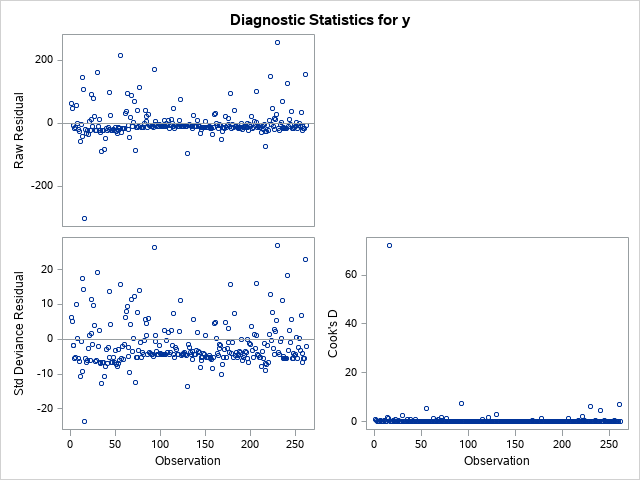
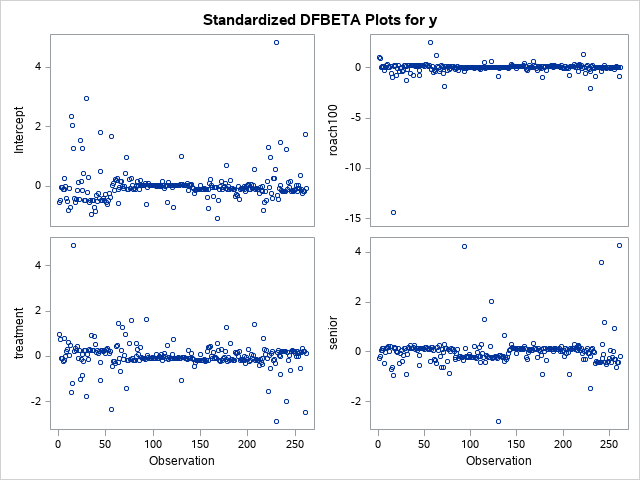

In [27]:
proc genmod data=roaches_m plots=(cooksd dfbetas resraw stdresdev);
    model y= roach100 treatment senior / dist=poisson link=log offset=logexpos;
    estimate 'Beta' treatment 1 / exp;
run;

## NB regression


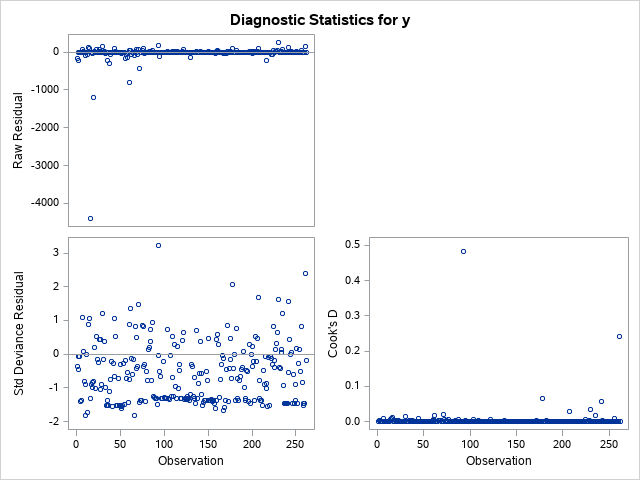
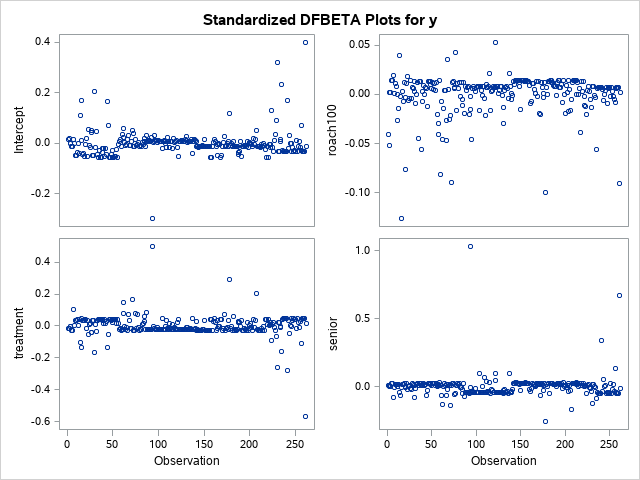

In [28]:
proc genmod data=roaches_m plots=(cooksd dfbetas resraw stdresdev);
    model y= roach100 treatment senior / dist=negbin link=log offset=logexpos;
    estimate 'Beta' treatment 1 / exp;
run;